## Определение перспективного тарифа для телеком компании

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов:**

**Тариф «Смарт»**

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

 - минута разговора: 3 рубля

 - сообщение: 3 рубля

 - 1 Гб интернет-трафика: 200 рублей
 
**Тариф «Ультра»**

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

 - минута разговора: 1 рубль
 
 - сообщение: 1 рубль
 
 - 1 Гб интернет-трафика: 150 рублей


** «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### Изучение общей информации о датасетах и предобработка данных

1)Импортируем необходимые для решения поставленных задач библиотеки

2)Посмотрим на начало и конец предложенного датасета

3)Соберем общие статистические данные с помощью функции DataFrame.describe()

In [1]:
# Импортируем библиотеки
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Импортируем данные
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

# установим отображение количества столбцов на экране
pd.options.display.max_columns = 40

#### Информация о звонках (таблица calls)

Посмотрим на таблицу со звонками:

id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок

In [3]:
# Посмотрим на общую информацию о датасете, начало и описательные статистики 
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


Видим, что пропущенных значений нет. Это хорошо, но необходимо поработать с типами данных.

In [4]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
calls.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


**Замена типа данных**

In [6]:
# Для проверки мин. и макс. зн-я, подходящего для хранения с использованием каждого целочисленного подтипа, можно воспользоваться методом numpy.iinfo()
int_types = ["int8", "int16", "int32","int64","uint8", "uint16", "uint32","uint64"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for uint16
-----------------------------

Так как значения переменной user_id варьируются от 1000 до 1499 - логично будет заменить тип на uint16:

In [7]:
calls['user_id'] = calls['user_id'].astype('uint16')

In [8]:
# Затем приведем переменную call_date к типу данных datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

In [9]:
# проверим замену
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  uint16        
dtypes: datetime64[ns](1), float64(1), object(1), uint16(1)
memory usage: 4.3+ MB


Все верно. Теперь нужно округлить значение переменной "duration" в большую сторону и тоже заменить ее тип.

**Округление длительности звонка в большую сторону**

 Согласно условию «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

In [10]:
calls['duration'] = calls['duration'].apply(np.ceil)

In [11]:
#Заменить тип данных переменной "duration" на uint8
calls['duration'] = calls['duration'].astype('uint8')

In [12]:
# проверим замену
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  uint8         
 3   user_id    202607 non-null  uint16        
dtypes: datetime64[ns](1), object(1), uint16(1), uint8(1)
memory usage: 2.9+ MB


**Распределение длительности звонков**

Применим метод value_counts(), подсчитывающего количество уникальных значений в списке к столбцу "duration":

In [13]:
calls['duration'].value_counts().sort_values()

38        2
36        2
37        2
34        3
35        5
33       10
32       17
31       30
30       39
29       56
28      104
27      151
26      257
25      363
24      468
23      720
22      975
21     1304
20     1806
19     2411
18     2984
17     3671
16     4551
15     5505
14     6554
13     7486
1      8402
12     8448
2      9194
11     9385
10    10186
3     10362
4     10918
9     10973
8     11272
5     11411
6     11457
7     11510
0     39613
Name: duration, dtype: int64

Построим также гистограмму распределения длительности звонков для наглядности:

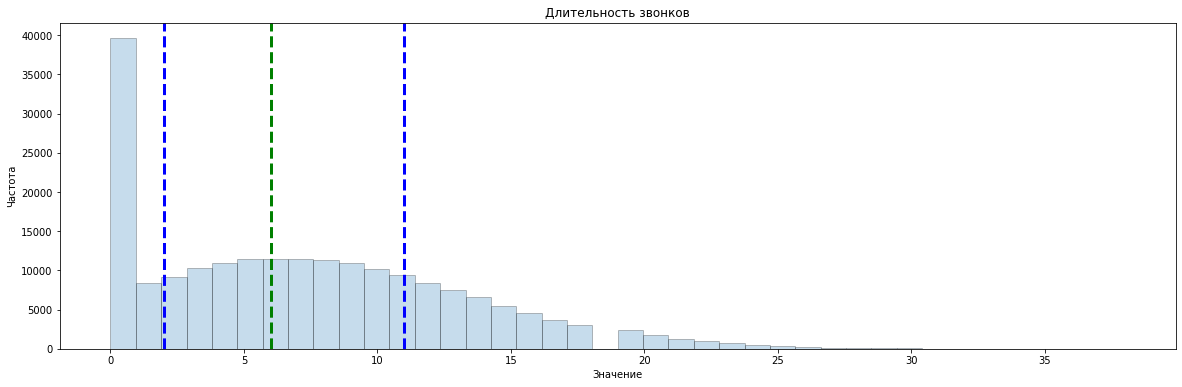

In [14]:
plt.figure(figsize =(20, 6))

hist1 = calls['duration'].plot(kind = 'hist', bins = 40, grid=True,  alpha=0.25, ec='black')
plt.axvline(x= calls['duration'].median(),   # линия медианы
                linewidth=3,   # толщина линии
                color='g',   # цвет линии
                linestyle='--')  # тип линии
plt.axvline(x= calls['duration'] .quantile(.25),   #  линия 25% квантили
                linewidth=3, 
                color='b', 
                linestyle='--')
plt.axvline(x=calls['duration'].quantile(.75),  #  линия 75% квантили
                linewidth=3, 
                color='b', 
                linestyle='--')
plt.title('Длительность звонков')  # Заголовок
plt.xlabel('Значение')  # подпишем ось Х
plt.ylabel('Частота')   # подпишем ось У
plt.grid()  # сетка
plt.show()  # отображаем график

Даже после округления в большую сторону у нас все равно пик приходится на звонки длительностью 0 минут. Почти 40000 звонков - это очень много. Мы могли бы предположить, что это звонки длительностью меньше минуты до окруления в большую сторону, но сейчас, полпгаю, не совсем корректно заменять 0 на 1. Скорее всего нули означают сброшенные или несостоявшиеся по какой-то другой причине звонки. Поэтому более правильно будет убрать эти значения, чтобы не получить потом некорректный результат.

In [15]:
#убираем звонки длительностью 0 минут из датасета

calls['duration'] = calls['duration'].replace(0, np.NaN)

calls = calls.dropna()

Посмотрим теперь на гистограмму длительности звонков:

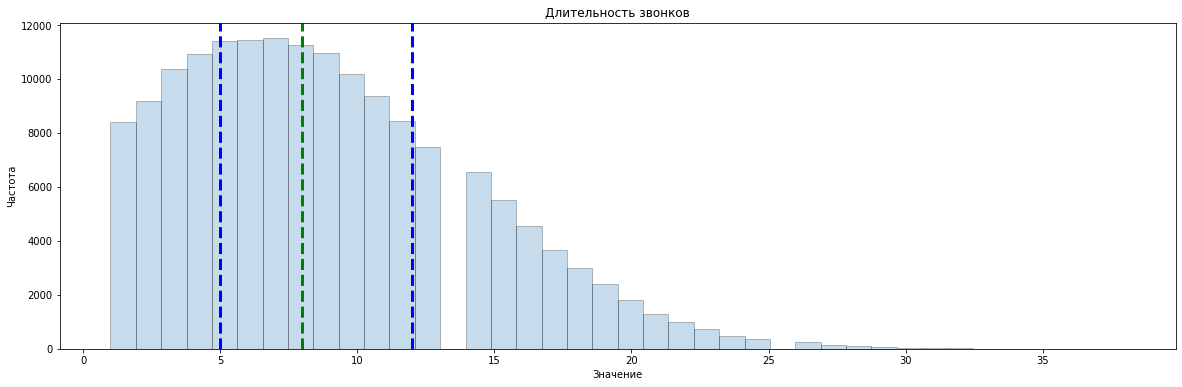

In [16]:
plt.figure(figsize =(20, 6))

hist1 = calls['duration'].plot(kind = 'hist', bins = 40, grid=True,  alpha=0.25, ec='black')
plt.axvline(x= calls['duration'].median(),   # линия медианы
                linewidth=3,   # толщина линии
                color='g',   # цвет линии
                linestyle='--')  # тип линии
plt.axvline(x= calls['duration'] .quantile(.25),   #  линия 25% квантили
                linewidth=3, 
                color='b', 
                linestyle='--')
plt.axvline(x=calls['duration'].quantile(.75),  #  линия 75% квантили
                linewidth=3, 
                color='b', 
                linestyle='--')
plt.title('Длительность звонков')  # Заголовок
plt.xlabel('Значение')  # подпишем ось Х
plt.ylabel('Частота')   # подпишем ось У
plt.grid()  # сетка
plt.show()  # отображаем график

Теперь пик приходится на звонки длительностью приблизительно 7 минут

Проверим данные на **наличие дубликатов**:

In [17]:
calls.duplicated().sum()

0

Дубликатов нет, перейдем к следующему датасету:

#### Информация о сообщениях (таблица messages)

id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение

In [18]:
# Посмотрим на общую информацию о датасете, начало и описательные статистики 
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [19]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [20]:
messages.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


Пропущенных значений нет. Но нужно поработать с типами данных.

**Замена типа данных**

In [21]:
# Так как значения переменной user_id варьируются от 1000 до 1499 - логично будет заменить тип на uint16:
messages['user_id'] = messages['user_id'].astype('uint16')

In [22]:
# Затем приведем переменную message_date к типу данных datetime
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

In [23]:
#проверим замену
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  uint16        
dtypes: datetime64[ns](1), object(1), uint16(1)
memory usage: 1.6+ MB


Проверим данные на **наличие дубликатов**:

In [24]:
messages.duplicated().sum()

0

Дубликатов нет.Теперь все в порядке. Перейдем к следующему датасету:

#### Информация о пользователях (таблица users)

user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

tariff — название тарифного плана

In [25]:
# Посмотрим на общую информацию о датасете, начало и описательные статистики 
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 19.6+ KB


Видим, что есть пропущенные значения в переменной churn_date (дата прекращения пользования тарифом). Однако в условии задания сказано, что, если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Вряд ли эта информация сильно нам понадобится в последующем анализе, поэтому не будем ничего делать с пропусками - оставим как есть. Но необходимо поработать с типами данных.

In [26]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [27]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


**Замена типа данных**

In [28]:
# Так как значения переменной user_id варьируются от 1000 до 1499 - логично будет заменить тип на uint16:
users['user_id'] = users['user_id'].astype('uint16')

In [29]:
# Приведем переменные reg_date и churn_date к типу данных datetime

users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

In [30]:
#Заменить тип данных переменной "age" на uint8
users['age'] = users['age'].astype('uint8')

In [31]:
# Проверим замену
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    uint16        
 1   age         500 non-null    uint8         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), object(4), uint16(1), uint8(1)
memory usage: 17.2+ KB


Проверим данные на **наличие дубликатов**:

In [32]:
users.duplicated().sum()

0

Отлично, с типами данных мы разобрались, диюликатов в этом наборе данных нет, а размах значений переменной 'age' также не вызывает подозрений (минимальный возрат - 18 лет, а максимальный - 75 лет). Можем переходить к следующему датасету.

#### Информация об интернет-сессиях (таблица internet)

Таблица internet (информация об интернет-сессиях):

id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя

In [33]:
# Посмотрим на общую информацию о датасете, начало и описательные статистики 
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


Пропущенных значений нет, но нужно проработать типы данных.

In [34]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Не очень понятна природа возникновения столбца Unnamed: 0, который дублирует индексы, так что можем смело его убрать.

In [35]:
#удаляем столбец 
internet = internet.drop('Unnamed: 0', axis = 1)

#проверяем замену
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [36]:
internet.describe().T

,count,mean,std,min,25%,50%,75%,max
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


**Замена типа данных**

In [37]:
# Так как значения переменной user_id варьируются от 1000 до 1499 - логично будет заменить тип на uint16:
internet['user_id'] = internet['user_id'].astype('uint16')

In [38]:
# Приведем переменную session_date к типу данных datetime

internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

Также, согласно условию, нужно округлить объём потраченного за сессию интернет-трафика в большую сторону:

In [39]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

In [40]:
# Для проверки мин. и макс. зн-я, подходящего для хранения с использованием каждого целочисленного подтипа, можно воспользоваться методом numpy.iinfo()
int_types = ["int8", "int16", "int32","int64","uint8", "uint16", "uint32","uint64"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for uint16
-----------------------------

In [41]:
# Теперь подберем подходящий диапазону значений тип данных
internet['mb_used'] = internet['mb_used'].astype('uint16')

**Распределение объёма потраченного за сессию интернет-трафика (в мегабайтах)**

Применим метод value_counts(), подсчитывающего количество уникальных значений в списке к столбцу "mb_used":

In [42]:
internet['mb_used'].value_counts().sort_values()

1388        1
1422        1
1531        1
1393        1
1610        1
        ...  
253       222
377       224
382       228
333       231
0       19598
Name: mb_used, Length: 1424, dtype: int64

В данном случае метод value_counts(), подсчитывающего количество уникальных значений в списке, не даст нам никакой полезной информации, поэтому построим гистограмму:

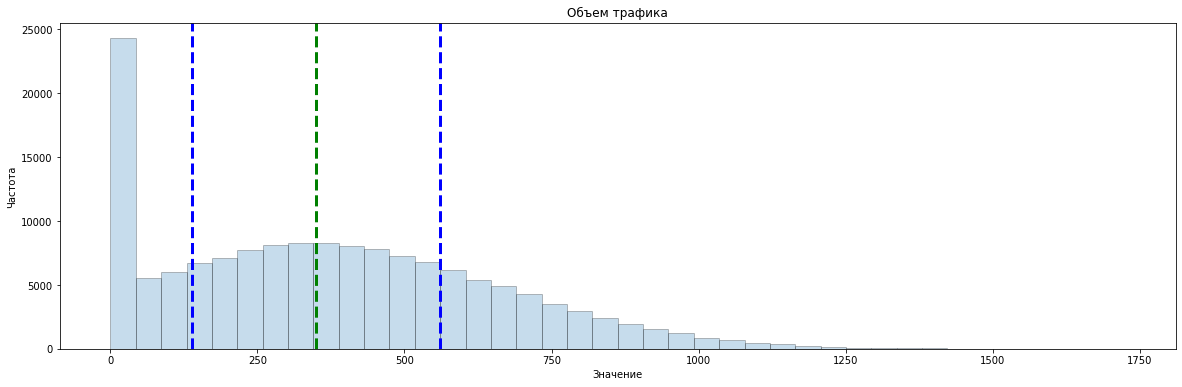

In [43]:
plt.figure(figsize =(20, 6))

hist1 = internet['mb_used'].plot(kind = 'hist', bins = 40, grid=True,  alpha=0.25, ec='black')
plt.axvline(x= internet['mb_used'].median(),   # линия медианы
                linewidth=3,   # толщина линии
                color='g',   # цвет линии
                linestyle='--')  # тип линии
plt.axvline(x= internet['mb_used'] .quantile(.25),   #  линия 25% квантили
                linewidth=3, 
                color='b', 
                linestyle='--')
plt.axvline(x=internet['mb_used'].quantile(.75),  #  линия 75% квантили
                linewidth=3, 
                color='b', 
                linestyle='--')
plt.title('Объем трафика')  # Заголовок
plt.xlabel('Значение')  # подпишем ось Х
plt.ylabel('Частота')   # подпишем ось У
plt.grid()  # сетка
plt.show()  # отображаем график

Пик приходится на нулевые значения (около 20000 наблюдений). Скорее всего, они возникли из-за того, что интернет-соединение было установлено, но возникли некоторые технические неполадки, и связь моментально прерывалась. Вероятно, стоит избавиться от этих значений, так как никакой содержтельной информации они нам не дадут.



In [44]:
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)

internet = internet.dropna()

Посмотрим теперь на гистограмму распределения объёма потраченного за сессию интернет-трафика: 

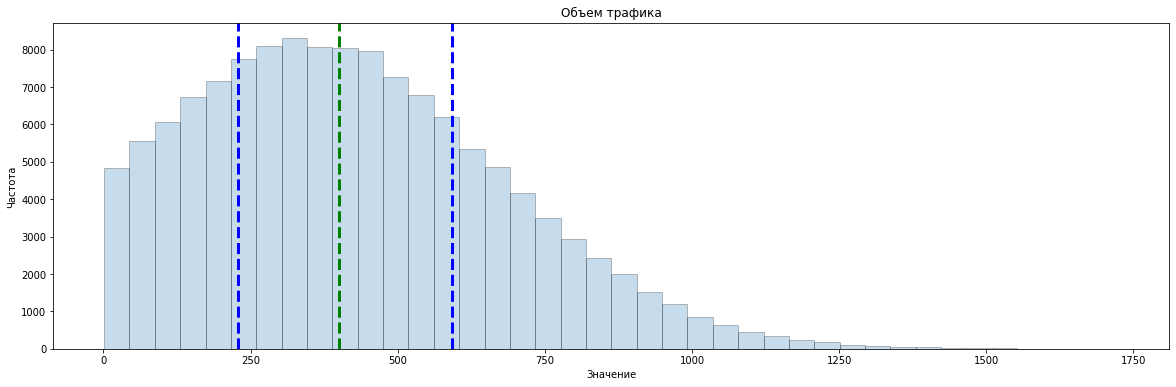

In [45]:
plt.figure(figsize =(20, 6))

hist1 = internet['mb_used'].plot(kind = 'hist', bins = 40, grid=True,  alpha=0.25, ec='black')
plt.axvline(x= internet['mb_used'].median(),   # линия медианы
                linewidth=3,   # толщина линии
                color='g',   # цвет линии
                linestyle='--')  # тип линии
plt.axvline(x= internet['mb_used'] .quantile(.25),   #  линия 25% квантили
                linewidth=3, 
                color='b', 
                linestyle='--')
plt.axvline(x=internet['mb_used'].quantile(.75),  #  линия 75% квантили
                linewidth=3, 
                color='b', 
                linestyle='--')
plt.title('Объем трафика')  # Заголовок
plt.xlabel('Значение')  # подпишем ось Х
plt.ylabel('Частота')   # подпишем ось У
plt.grid()  # сетка
plt.show()  # отображаем график

И проверим данные на **наличие дубликатов**:

In [46]:
internet.duplicated().sum()

0

Дубликатов нет - перейдем к последнему датасету.

#### Информация о тарифах

Таблица tariffs (информация о тарифах):
    
tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [47]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Данный датасет хранит в себе справочную информацию о тарифах, поэтому он не нуждается в предобработке.

**Вывод:**

Таким образом, мы изучили все предложенные нам датасеты, избавились от некоторых данных, привели данные к нужным типам и проверили их на наличие дубликатов. Переходим к следующему разделу.

### Рассчёты и добавление результатов в таблицу

Необходимо посчитать для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам;

- количество отправленных сообщений по месяцам;

- объем израсходованного интернет-трафика по месяцам;

- помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [48]:
# создадим новый столбец с порядковым номером месяца в таблице calls
calls['month'] = calls['call_date'].dt.month

In [49]:
# проверим
calls.head()

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9


In [50]:
# Сгруппируем данные по переменным "user_id" и "month", посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам и сбросим индекс:
# шаблон: data.groupby('column1').agg({'column2': ['count', 'sum'], 'column3': ['min', 'max']})

user_calls = calls.groupby(['user_id', 'month']).agg({'id': 'count', 'duration': 'sum'}).reset_index()

In [51]:
user_calls.head()

,user_id,month,id,duration
0,1000,5,17,159.0
1,1000,6,28,172.0
2,1000,7,41,340.0
3,1000,8,42,408.0
4,1000,9,46,466.0


Но теперь нужно переименовать столбцы 'id' и 'duration', чтобы было понятно, о чем идет речь.

In [52]:
# Подготовим список new_names с новыми именами для столбцов
new_names = ['user_id','month','number_of_calls_per_month','number_of_minutes_per_month']

In [53]:
# Переименуем столбцы таблицы, которая хранится в переменной user_calls
user_calls.set_axis(new_names, axis = 'columns', inplace = True)

In [54]:
# проверим замену
user_calls.head()

,user_id,month,number_of_calls_per_month,number_of_minutes_per_month
0,1000,5,17,159.0
1,1000,6,28,172.0
2,1000,7,41,340.0
3,1000,8,42,408.0
4,1000,9,46,466.0


#### Количество отправленных сообщений по месяцам

In [55]:
# создадим новый столбец с порядковым номером месяца в таблице messages
messages['month'] = messages['message_date'].dt.month

In [56]:
# проверим
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [57]:
# Сгруппируем данные по переменным "user_id" и "month", посчитаем количество отправленных сообщений по месяцам и сбросим индекс:

user_messages = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()

In [58]:
user_messages.head()

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [59]:
# Подготовим список new_names с новыми именами для столбцов
new_names1 = ['user_id','month','number_of_messages_per_month']

In [60]:
# Переименуем столбцы таблицы, которая хранится в переменной user_messages
user_messages.set_axis(new_names1, axis = 'columns', inplace = True)

In [61]:
# проверим замену
user_messages.head()

,user_id,month,number_of_messages_per_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


#### Объем израсходованного интернет-трафика по месяцам

In [62]:
# создадим новый столбец с порядковым номером месяца в таблице messages
internet['month'] = internet['session_date'].dt.month

In [63]:
# проверим
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,113.0,2018-11-25,1000,11
1,1000_1,1053.0,2018-09-07,1000,9
2,1000_2,1198.0,2018-06-25,1000,6
3,1000_3,551.0,2018-08-22,1000,8
4,1000_4,303.0,2018-09-24,1000,9


In [64]:
# Сгруппируем данные по переменным "user_id" и "month", посчитаем Объем израсходованного интернет-трафика по месяцам и сбросим индекс:

user_internet = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()

In [65]:
user_internet.head()

,user_id,month,mb_used
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0


In [66]:
# Подготовим список new_names с новыми именами для столбцов
new_names2 = ['user_id','month','number_of_mb_used_per_month']

In [67]:
# Переименуем столбцы таблицы, которая хранится в переменной user_internet
user_internet.set_axis(new_names2, axis = 'columns', inplace = True)

In [68]:
# проверим замену
user_internet.head()

,user_id,month,number_of_mb_used_per_month
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0


#### Помесячная выручка с каждого пользователя

В данном пункте необходимо создать единую таблицу. Здесь нужен тип слияния outer. Он объединяет данные из внешней общей области — такие, которые есть хотя бы в одном из датафреймов.

In [69]:
user_calls.head()

,user_id,month,number_of_calls_per_month,number_of_minutes_per_month
0,1000,5,17,159.0
1,1000,6,28,172.0
2,1000,7,41,340.0
3,1000,8,42,408.0
4,1000,9,46,466.0


In [70]:
user_messages.head()

,user_id,month,number_of_messages_per_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [71]:
df = user_calls.merge(user_messages, on=['user_id','month'], how='outer')

In [72]:
df.head()

,user_id,month,number_of_calls_per_month,number_of_minutes_per_month,number_of_messages_per_month
0,1000,5,17.0,159.0,22.0
1,1000,6,28.0,172.0,60.0
2,1000,7,41.0,340.0,75.0
3,1000,8,42.0,408.0,81.0
4,1000,9,46.0,466.0,57.0


In [73]:
user_internet.head()

,user_id,month,number_of_mb_used_per_month
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0


In [74]:
df = df.merge(user_internet, on=['user_id','month'], how = 'outer')

In [75]:
df.head()

,user_id,month,number_of_calls_per_month,number_of_minutes_per_month,number_of_messages_per_month,number_of_mb_used_per_month
0,1000,5,17.0,159.0,22.0,2256.0
1,1000,6,28.0,172.0,60.0,23257.0
2,1000,7,41.0,340.0,75.0,14016.0
3,1000,8,42.0,408.0,81.0,14070.0
4,1000,9,46.0,466.0,57.0,14581.0


Далее нам потребуется режим объединения 'left', который указывает, что в результат слияния обязательно должны войти все строки из левого датафрейма:

In [76]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [77]:
df = df.merge(users, on='user_id', how='left')

In [78]:
df.head()

,user_id,month,number_of_calls_per_month,number_of_minutes_per_month,number_of_messages_per_month,number_of_mb_used_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,17.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,28.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,41.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,42.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,46.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [79]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Далее нужно объединять таблицы по названию тарифа, но прежде необходимо сделать единое название (заменить tariff_name на tariff)

In [80]:
# Подготовим список new_names с новыми именами для столбцов
new_names3 = ['messages_included','mb_per_month_included','minutes_included','rub_monthly_fee','rub_per_gb','rub_per_message','rub_per_minute','tariff']

In [81]:
# Переименуем столбцы таблицы, которая хранится в переменной tariffs
tariffs.set_axis(new_names3, axis = 'columns', inplace = True)

In [82]:
df = df.merge(tariffs, on='tariff', how='left')

In [83]:
df.head()

,user_id,month,number_of_calls_per_month,number_of_minutes_per_month,number_of_messages_per_month,number_of_mb_used_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,17.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,28.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,41.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,42.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,46.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Таким образом, мы получили общую таблицу, с которой будет удобно производить последующие вычисления. Но сперва нужно проверить новый датасет на наличие дубликатов и пропусков.

**Проверка нового датасета на наличие дубликатов**

In [84]:
df.duplicated().sum()

0

Отлично, дубликатов нет.

**Проверка нового датасета на наличие пропусков**

In [85]:
df.isnull().sum()

user_id                            0
month                              0
number_of_calls_per_month         46
number_of_minutes_per_month       46
number_of_messages_per_month     497
number_of_mb_used_per_month       13
age                                0
churn_date                      3027
city                               0
first_name                         0
last_name                          0
reg_date                           0
tariff                             0
messages_included                  0
mb_per_month_included              0
minutes_included                   0
rub_monthly_fee                    0
rub_per_gb                         0
rub_per_message                    0
rub_per_minute                     0
dtype: int64

У нас имеются пропуски в переменных number_of_calls_per_month и number_of_minutes_per_month (Количество сделанных звонков и израсходованных минут разговора по месяцам), а также в переменных number_of_messages_per_month (Количество отправленных сообщений по месяцам) и number_of_mb_used_per_month (Объем израсходованного интернет-трафика по месяцам). Учитывая, то количество пропусков не критичное, - заменим пропуски на нули.


*Помним, что пропуски в переменной churn_date (дата прекращения пользования тарифом) мы решили оставить без изменений.

In [86]:
df['number_of_calls_per_month'] = df['number_of_calls_per_month'].fillna(0)

In [87]:
df['number_of_minutes_per_month'] = df['number_of_minutes_per_month'].fillna(0)

In [88]:
df['number_of_messages_per_month'] = df['number_of_messages_per_month'].fillna(0)

In [89]:
df['number_of_mb_used_per_month'] = df['number_of_mb_used_per_month'].fillna(0)

In [90]:
#проверим замену 
df.isnull().sum()

user_id                            0
month                              0
number_of_calls_per_month          0
number_of_minutes_per_month        0
number_of_messages_per_month       0
number_of_mb_used_per_month        0
age                                0
churn_date                      3027
city                               0
first_name                         0
last_name                          0
reg_date                           0
tariff                             0
messages_included                  0
mb_per_month_included              0
minutes_included                   0
rub_monthly_fee                    0
rub_per_gb                         0
rub_per_message                    0
rub_per_minute                     0
dtype: int64

Теперь можем приступать к вычислениям - найдем помесяную выручку с каждого пользователя.

In [91]:
df['monthly_revenue'] = ((df['number_of_minutes_per_month'] - df['minutes_included'])*df['rub_per_minute'])\
    + ((df['number_of_messages_per_month'] - df['messages_included'])*df['rub_per_message'])\
    + ((df['number_of_mb_used_per_month'] - df['mb_per_month_included'])/1024*df['rub_per_gb'])

In [92]:
df.head()

,user_id,month,number_of_calls_per_month,number_of_minutes_per_month,number_of_messages_per_month,number_of_mb_used_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue
0,1000,5,17.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,-7988.531250
1,1000,6,28.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,-4861.212891
2,1000,7,41.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,-6031.875000
3,1000,8,42.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,-5949.964844
4,1000,9,46.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,-5841.111328


Видим, что есть строки, в которых выручка отрицательная, такие значения нужно заменить на нули.

In [93]:
#строки, где выручка положительная, оставляем без изменений
df.loc[df['monthly_revenue'] > 0, 'monthly_revenue'] = df['monthly_revenue']

#строки, где выручка равна нулю или отрицательная, заменяем на нули
df.loc[df['monthly_revenue'] <= 0, 'monthly_revenue'] = 0

#прибавляем абонентскую плату
df['monthly_revenue'] = df['monthly_revenue'] + df['rub_monthly_fee']

In [94]:
def overspending(row):
    if row['monthly_revenue'] > 0:
        return "пользователь вышел за рамки предложенных услуг"
    else:
        return "пользователь не вышел за рамки предложенных услуг"
        

In [95]:
df['overspending'] = df.apply(lambda x: overspending(x), axis=1)

In [96]:
df.head()

,user_id,month,number_of_calls_per_month,number_of_minutes_per_month,number_of_messages_per_month,number_of_mb_used_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue,overspending
0,1000,5,17.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0,пользователь вышел за рамки предложенных услуг
1,1000,6,28.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0,пользователь вышел за рамки предложенных услуг
2,1000,7,41.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0,пользователь вышел за рамки предложенных услуг
3,1000,8,42.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0,пользователь вышел за рамки предложенных услуг
4,1000,9,46.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0,пользователь вышел за рамки предложенных услуг


In [97]:
# код ревьюера:
def monthly_revenue2(row):
    monthly_revenue = ((row['number_of_minutes_per_month'] - row['minutes_included'])*row['rub_per_minute'])\
    + ((row['number_of_messages_per_month'] - row['messages_included'])*row['rub_per_message'])\
    + ((row['number_of_mb_used_per_month'] - row['mb_per_month_included'])/1024*row['rub_per_gb'])
    
    total = 0
    if monthly_revenue > 0:
        total += monthly_revenue
    total += row['rub_monthly_fee']
    return total

df['monthly_revenue2'] = df.apply(lambda x: monthly_revenue2(x), axis=1)
df[['monthly_revenue','monthly_revenue2']].sample(10)

,monthly_revenue,monthly_revenue2
598,1950.000000,1950.000000
191,550.000000,550.000000
197,550.000000,550.000000
3031,1950.000000,1950.000000
3001,1419.921875,1419.921875
1632,847.898438,847.898438
2016,843.828125,843.828125
2178,1950.000000,1950.000000
954,906.375000,906.375000
2826,1113.601562,1113.601562


In [98]:
#посмотрим теперь на датасет
df.head()

,user_id,month,number_of_calls_per_month,number_of_minutes_per_month,number_of_messages_per_month,number_of_mb_used_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue,overspending,monthly_revenue2
0,1000,5,17.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0,пользователь вышел за рамки предложенных услуг,1950.0
1,1000,6,28.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0,пользователь вышел за рамки предложенных услуг,1950.0
2,1000,7,41.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0,пользователь вышел за рамки предложенных услуг,1950.0
3,1000,8,42.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0,пользователь вышел за рамки предложенных услуг,1950.0
4,1000,9,46.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0,пользователь вышел за рамки предложенных услуг,1950.0


**Вывод:**

Таким образом, мы собрали общую таблицу и добавили в нее интересующие нас показатели, такие как: количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам; помесячную выручку с каждого пользователя. Переходим к следующему смысловому блоку.

###  Детальный анализ данных

В данном разделе нам предстоит описать поведение клиентов оператора, исходя из выборки:

- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

- посчитать среднее количество

- дисперсию 

- стандартное отклонение

- построить  гистограммы

- описать распределения

#### Количество минут разговора, которое требуется пользователям каждого тарифа в месяц

Сгруппируем данные по назваю тарифа и посчитаем для кажого тарифа среднее колиество минут разговора, дисперсию и стандартное отклонение. Значения округлим до двух знаков после запятой для наглядности:

In [99]:
df.groupby('tariff').agg({'number_of_minutes_per_month':['mean','median','var','std']}).style.format("{:.2f}")

Пользователям тарифа "Ультра", в среднем, требуется больше минут разговора, но это и логично, поскольку тариф включает в себя гораздо большую продолжительность звонка.

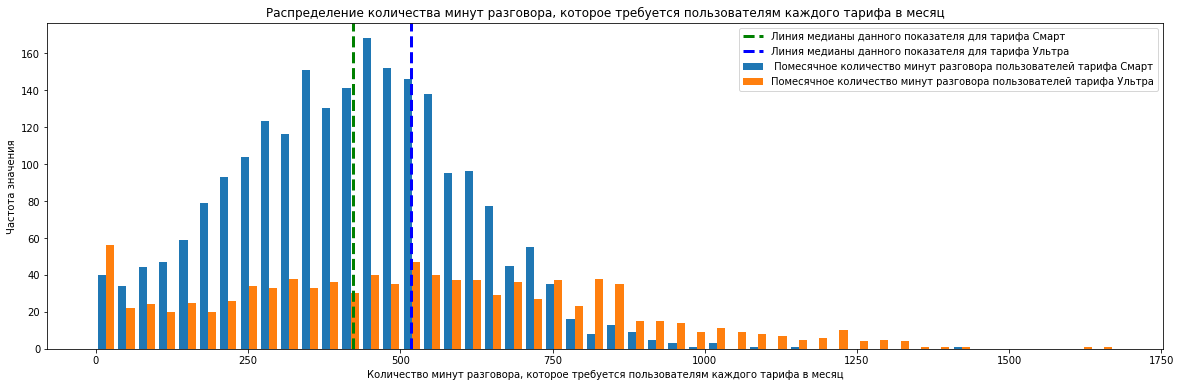

In [100]:
# Построим две гистограммы, где будет отображена частота возникновения того ли иного количества минут разговора пользователей тарифа Смарт и Ультра 
plt.figure(figsize =(20, 6))

x = df[df['tariff'] == 'smart']['number_of_minutes_per_month']
y = df[df['tariff'] == 'ultra']['number_of_minutes_per_month']
plt.hist([x, y], bins = 50, label=[' Помесячное количество минут разговора пользователей тарифа Смарт', 'Помесячное количество минут разговора пользователей тарифа Ультра'])
plt.axvline(x=df[df['tariff'] == 'smart']['number_of_minutes_per_month'].median(), label = 'Линия медианы данного показателя для тарифа Смарт',   # линия медианы
                linewidth=3,   # толщина линии
                color='g',   # цвет линии
                linestyle='--')  # тип линии
plt.axvline(x=df[df['tariff'] == 'ultra']['number_of_minutes_per_month'].median(), label = 'Линия медианы данного показателя для тарифа Ультра',   # линия медианы
                linewidth=3,   # толщина линии
                color='b',   # цвет линии
                linestyle='--')  # тип линии
plt.title('Распределение количества минут разговора, которое требуется пользователям каждого тарифа в месяц')
plt.xlabel('Количество минут разговора, которое требуется пользователям каждого тарифа в месяц')
plt.ylabel('Частота значения')
plt.legend()
plt.show()

Посмотрим, приверженцев, какого тарифа больше (логично, что Смарт):

In [101]:
df['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

Действительно, количество наблюдений с тариформ "Смарт" более, чем в два раза, больше. Распределение количества минут разговора, которое требуется пользователям тарифа "Смарт" гораздо больше похоже на нормальное. Это может быть,как раз, потому, что и самих наблюдений больше. Больше всего пользователей тарифа "Смарт" разговаривают приблизительно 430-450 минут, что близко к медианному значению (418 минут). Пользователи тарифа "Ультра", в среднем, говорят больше (один из пиков приходится на 520 минут). Пик в районе нуля мог возникнуть из-за того, что мы заменили пропущенные значения во время объединения таблиц на нули. Гистограмма  распределения минут разговора пользователей тарифа "Ультра" более пологая и совсем не похожа на нормальное распределение)

#### Количество сообщений, которое требуется пользователям каждого тарифа в месяц

In [102]:
df.groupby('tariff').agg({'number_of_messages_per_month':['mean','median','var','std']}).style.format("{:.2f}")

Пользователям тарифа "Ультра", в среднем, требуется больше СМС, что логично, поскольку это предусмотрено условиями тарифа.

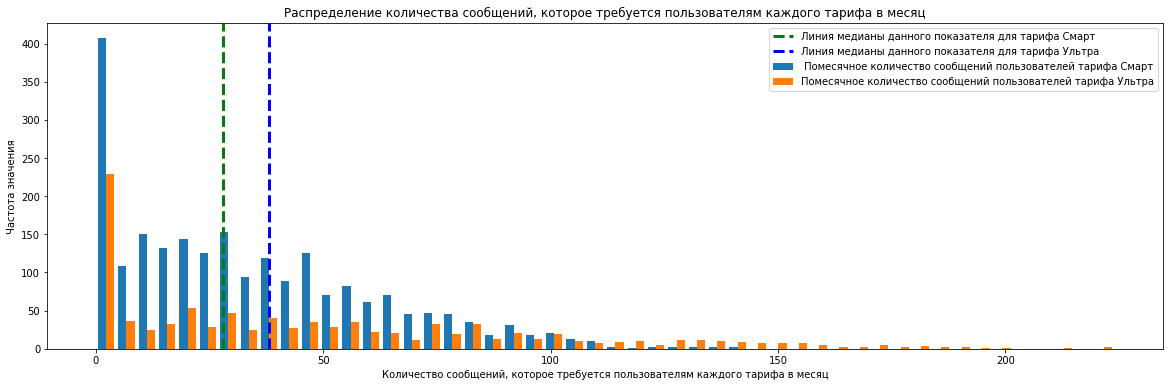

In [103]:
# Построим две гистограммы, где будет отображена частота возникновения того ли иного количества сообщений пользователей тарифа Смарт и Ультра 
plt.figure(figsize =(20, 6))

x = df[df['tariff'] == 'smart']['number_of_messages_per_month']
y = df[df['tariff'] == 'ultra']['number_of_messages_per_month']
plt.hist([x, y], bins = 50, label=[' Помесячное количество сообщений пользователей тарифа Смарт', 'Помесячное количество сообщений пользователей тарифа Ультра'])
plt.axvline(x=df[df['tariff'] == 'smart']['number_of_messages_per_month'].median(), label = 'Линия медианы данного показателя для тарифа Смарт',   # линия медианы
                linewidth=3,   # толщина линии
                color='g',   # цвет линии
                linestyle='--')  # тип линии
plt.axvline(x=df[df['tariff'] == 'ultra']['number_of_messages_per_month'].median(), label = 'Линия медианы данного показателя для тарифа Ультра',  # линия медианы
                linewidth=3,   # толщина линии
                color='b',   # цвет линии
                linestyle='--')  # тип линии
plt.title('Распределение количества сообщений, которое требуется пользователям каждого тарифа в месяц')
plt.xlabel('Количество сообщений, которое требуется пользователям каждого тарифа в месяц')
plt.ylabel('Частота значения')
plt.legend()
plt.show()

В данном случае гистограммы распределения очень схожи. Пики находятся в районе нуля. Такой результат можно объяснить тем, что СМС давно превратились в пережиток прошлого, и по прямому назначению (для общения) - ими уже никто не пользуется)

#### Объем интернет-трафика, который требуется пользователям каждого тарифа в месяц

In [104]:
df.groupby('tariff').agg({'number_of_mb_used_per_month':['mean','median','var','std']}).style.format("{:.2f}")

Ожидаемо, что и объем трафика, необходимого  пользователям тарифа "Ультра", в среднем, выше.

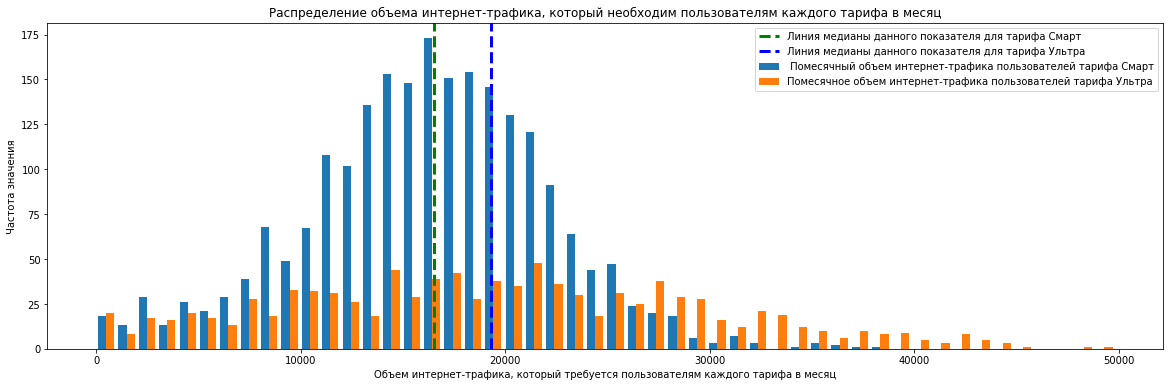

In [105]:
# Построим две гистограммы, где будет отображена частота возникновения того ли иного объема трафика
plt.figure(figsize =(20, 6))

x = df[df['tariff'] == 'smart']['number_of_mb_used_per_month']
y = df[df['tariff'] == 'ultra']['number_of_mb_used_per_month']
plt.hist([x, y], bins = 50, label=[' Помесячный объем интернет-трафика пользователей тарифа Смарт', 'Помесячное объем интернет-трафика пользователей тарифа Ультра'])
plt.axvline(x=df[df['tariff'] == 'smart']['number_of_mb_used_per_month'].median(), label = 'Линия медианы данного показателя для тарифа Смарт',   # линия медианы
                linewidth=3,   # толщина линии
                color='g',   # цвет линии
                linestyle='--')  # тип линии
plt.axvline(x=df[df['tariff'] == 'ultra']['number_of_mb_used_per_month'].median(), label = 'Линия медианы данного показателя для тарифа Ультра',   # линия медианы
                linewidth=3,   # толщина линии
                color='b',   # цвет линии
                linestyle='--')  # тип линии
plt.title('Распределение объема интернет-трафика, который необходим пользователям каждого тарифа в месяц')
plt.xlabel('Объем интернет-трафика, который требуется пользователям каждого тарифа в месяц')
plt.ylabel('Частота значения')
plt.legend()
plt.show()

 Распределение объема трафика, который требуется пользователям тарифа "Смарт" похоже на нормальное. Больше всего пользователей тарифа "Смарт" тратят приблизительно 16000 МБ, что близко к медианному значению. Пользователи тарифа "Ультра", в среднем, тратят больше. Гистограмма тарифа "Ультра" более пологая, но имеет несколько выраженных пиков - 14000, 22000 и 2700 МБ (все приблизительно).

**Вывод:**

Таким образом, мы проанализировали, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.  

### Проверка гипотез

**Гипотезы:**

 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
 
Пороговое значение alpha задается самостоятельно. Необходимо пояснить, как формулировались нулевая и альтернативная гипотезы, какой критерий использовался для проверки гипотез и почему.

In [106]:
# Для начала напишем функцию, которая будет устранять выбросы
def delete_outliers(df, column):
    q1 = df[column].quantile(0.01)                 
    q3 = df[column].quantile(0.99)
    iqr = q3 - q1
    cutoff = (df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr))
    return df.loc[cutoff]

Для начала посмотрим на интересующий нас показатель (помесячная выручка с каждого пользователя) до утранения выбросов.

In [107]:
# Создаем две подвыборки для каждого тарифа для удобства

smart = df.query('tariff == "smart"')
ultra = df.query('tariff == "ultra"')

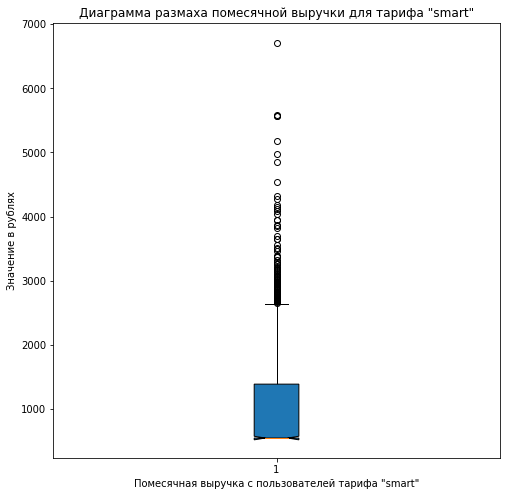

In [108]:
# Построим диаграмму размаха помесячной выручки для тарифа "smart"
plt.figure(figsize =(8, 8))
plt.boxplot(smart['monthly_revenue'],  notch=True, sym="o", widths = 0.1, patch_artist = True)
plt.title('Диаграмма размаха помесячной выручки для тарифа "smart"')
plt.xlabel('Помесячная выручка с пользователей тарифа "smart"')
plt.ylabel('Значение в рублях')
plt.show()

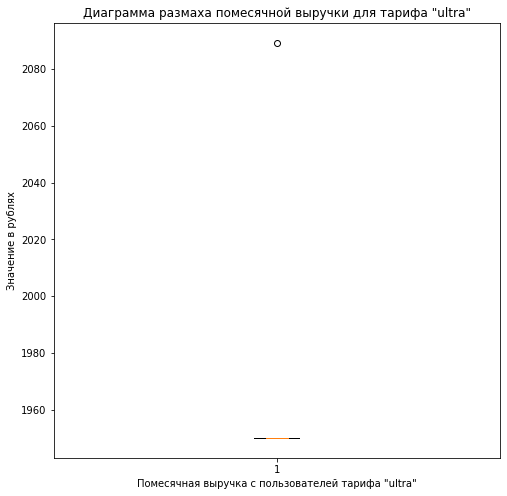

In [109]:
# Построим диаграмму размаха помесячной выручки для тарифа "ultra"
plt.figure(figsize =(8, 8))
plt.boxplot(ultra['monthly_revenue'],  notch=True, sym="o", widths = 0.1, patch_artist = True)
plt.title('Диаграмма размаха помесячной выручки для тарифа "ultra"')
plt.xlabel('Помесячная выручка с пользователей тарифа "ultra"')
plt.ylabel('Значение в рублях')
plt.show()

Видно, что достаточно много выбросов у этого показателя в тарифе 'Смарт', а диаграмма размаха тарифа 'Ультра' и вовсе не выглядит информативной. Так что изучим более детально выручку от данного тарифа:

In [110]:
df.groupby('tariff').agg({'monthly_revenue':['mean','median','var','std']}).style.format("{:.2f}")

Теперь ситуация проясняется - среднее значение, равное 1950.14, почти не отличается от ежемесячной платы. То есть пользователи данного тарифа почти не выходят за рамки предложенных услуг.

In [111]:
#Применим функцию удаления выбросов к нашим данным
smart= delete_outliers(smart, 'monthly_revenue')

ultra= delete_outliers(ultra, 'monthly_revenue')

Теперь приступаем к проверке гипотез. Поскольку сравниваемые выборки независимы между собой - будем использовать t-критерий Стьюдента. Воспользуемся функцией ttest_ind из модуля scipy.stats:

#### Гипотеза № 1

Были сформулированы следующие гипотезы:

**H0:** средняя выручка пользователей тарифов «Ультра» **равна** средней выручке пользователей тарифов «Смарт»

**H1:** средняя выручка пользователей тарифов «Ультра» не равна средней выручке пользователей тарифов «Смарт»


In [112]:
# Задаем пороговое значение
alpha = 0.05

results = st.ttest_ind(
    smart['monthly_revenue'], 
    ultra['monthly_revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.858884823251926e-262
Отвергаем нулевую гипотезу


Есть значимые различия между выборками. 
Действительно, пользователи тарифа "Ультра",в среднем, приносят большую прибыль, поскольку их абонентская плата более чем в  3,5 раза выше, даже вопреки тому, что пользователи тарифа "Смарт" часто выходят за границы предложенных услуг.

#### Гипотеза № 2

In [113]:
df['city'].value_counts().sort_values()

Иваново              2
Кемерово             5
Химки                5
Нижневартовск        6
Сургут               6
                  ... 
Краснодар           86
Уфа                 95
Новосибирск         98
Санкт-Петербург    270
Москва             611
Name: city, Length: 76, dtype: int64

In [114]:
# Создадим новый столбеуц
df['region'] = np.where(df['city'] == 'Москва', 'Москва', 'не Москва')

In [115]:
df['region'].value_counts()

не Москва    2603
Москва        611
Name: region, dtype: int64

Для начала посмотрим на интересующий нас показатель (помесячная выручка с каждого пользователя в Москве и другом регионе) до утранения выбросов.

In [116]:
# Создаем две подвыборки для каждого региона для удобства

moscow = df.query('region == "Москва"')
region = df.query('region == "не Москва"')

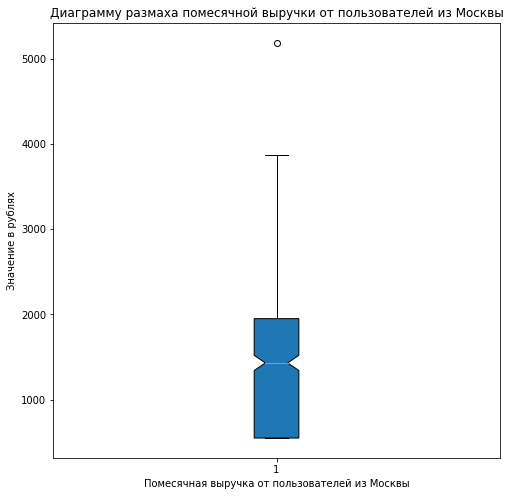

In [117]:
# Построим диаграмму размаха помесячной выручки для пользователей из Москвы
plt.figure(figsize =(8, 8))
plt.boxplot(moscow['monthly_revenue'],  notch=True, sym="o", widths = 0.1, patch_artist = True)
plt.title('Диаграмму размаха помесячной выручки от пользователей из Москвы')
plt.xlabel('Помесячная выручка от пользователей из Москвы')
plt.ylabel('Значение в рублях')
plt.show()

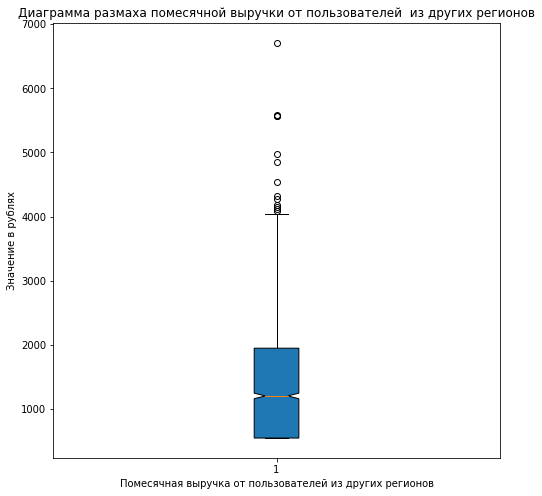

In [118]:
# Построим диаграмму размаха помесячной выручки для пользователей не из Москвы
plt.figure(figsize =(8, 8))
plt.boxplot(region['monthly_revenue'],  notch=True, sym="o", widths = 0.1, patch_artist = True)
plt.title('Диаграмма размаха помесячной выручки от пользователей  из других регионов')
plt.xlabel('Помесячная выручка от пользователей из других регионов')
plt.ylabel('Значение в рублях')
plt.show()

In [119]:
#Применим функцию удаления выбросов к нашим данным
moscow= delete_outliers(moscow, 'monthly_revenue')

region= delete_outliers(region, 'monthly_revenue')

Теперь приступаем к проверке гипотез. 

**H0:** средняя выручка пользователей из Москвы **не отличается** от выручки пользователей из других регионов

**H1:** средняя выручка пользователей из Москвы **отличается** от выручки пользователей из других регионов

In [120]:
# Задаем пороговое значение
alpha = 0.05

results = st.ttest_ind(
    moscow['monthly_revenue'], 
    region['monthly_revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5537203655893468
Не получилось отвергнуть нулевую гипотезу


Таким образом, верно утверждение, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. Разница не является статистически значимой.

### Общий  Вывод

- Больше всего пользователей тарифа "Смарт" разговаривают приблизительно 430-450 минут


- Пользователи тарифа "Ультра", в среднем, говорят больше (один из пиков приходится на 520 минут). 


- Пользователи обоих тарифов не жалуют СМС, но такой результат можно объяснить тем, что СМС давно превратились в пережиток прошлого, и по прямому назначению (для общения) - ими уже никто не пользуется)


- Больше всего пользователей тарифа "Смарт" тратят приблизительно 16000 МБ интернет-трафика


- Пользователи тарифа "Ультра", в среднем, тратят больше.

Посмотрим на таблицу:

|Тариф| Среднее значения помесячной выручки (руб)|
|:----|:----|
|Смарт|1040.51|
|Ультра|1950.14|


- Среднее значение помесячной выручки от пользователей тарифа "Ультра", равное 1950.14, почти не отличается от ежемесячной платы. То есть пользователи данного тарифа почти не выходят за рамки предложенных услуг.


- А пользователям тарифа "Смарт" ,в большинстве своем, не хватает предоставленных услуг, и им приходится доплачивать,что весьма печально, поскольку это может привести к оттоку клиентов.


- Но пользователи тарифа "Ультра",в среднем, все равно приносят бОльшую прибыль, поскольку их абонентская плата более чем в 3,5 раза выше, даже вопреки тому, что пользователи тарифа "Смарт" часто выходят за границы предложенных услуг.


- Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

